# Exploring eBay Car Sales Data

##  1. Introduction

In this project we are going to work with a data set containing the details of used cars from `eBay Klenanzeigen` a classified section of German eBay website. The link to the dataset is __[here](https://data.world/data-society/used-cars-data)__. We are going to work on a dataset with only *50000 data points* for ease of analysis. 

*The objective of this project is :-*
* Clean the data
* Analyze the included used car listings

In [1]:
#import pandas and numpy libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#read the csv file, with encoding equal to Latin-1 & Windows-1252 seperately
autos = pd.read_csv('autos.csv', encoding = 'Latin-1')
autos = pd.read_csv('autos.csv', encoding = 'Windows-1252')

In [3]:
#run the autos.info() method to check the information about the dataframe
autos.info()

#run the autos.head() method to check the first five rows of the dataframe
autos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


Here we observe that *autos.csv* file gives an error message while reading it with default encoding `UTF-8`. But can be read with both `Latin-1` and `Windows-1252` encodings. This data set has *50000 rows* and *20 columns*. Among the columns, *13* are *string data-types* and *7* are *integer data-types*. There are *5* columns with *null values* and all these have *\< 20%* null values. The column names are in *camelcase*.

## 2. Cleaning Column Names for Ease of Analysis

Ley us look into the column names in the dataframe.

In [4]:
#apply df.columns attribute to look at the column names
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

We observe that the column names are in *camelcase* instead of *snakecase*, which is preffered by python. Further we will change the column names to *snakecase* and also rename some of the column names to be more descriptive.

In [5]:
#using df.rename() method change the column names of autos dataset as in the dictionary below
autos.rename(columns = {'dateCrawled':'date_crawled', 'offerType':'offer_type', 'abtest': 'ab_test', 'vehicleType': 'vehicle_type', 'yearOfRegistration': 'registration_year', 'gearbox': 'gear_box', 'powerPS':'power_ps', 'monthOfRegistration':'registration_month', 'fuelType':'fuel_type', 'notRepairedDamage':'unrepaired_damage','dateCreated':'date_created', 'nrOfPictures':'nr_of_pictures', 'postalCode':'postal_code', 'lastSeen':'last_seen'}, inplace=True)  

In [6]:
#check few rows of the autos dataset using df.head() method
autos.head()

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gear_box,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,date_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


Column names have been changed from *camelcase* to *snakecase* and some of the column names have been re-written. Now the column names are more clear and easy to read.

##  3. Initial Exploration and Cleaning

Here we are going to investigate the columns more carefully. We will use *DataFrame.decribe()* method inorder to check if any of the columns have *single value* and if there are any columns with *numeric data stored as text*.  

In [7]:
#apply autos.describe() method for only string data types
autos.describe(include = 'object')

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,gear_box,model,odometer,fuel_type,brand,unrepaired_damage,date_created,last_seen
count,50000,50000,50000,50000,50000,50000,44905,47320,47242,50000,45518,50000,40171,50000,50000
unique,48213,38754,2,2,2357,2,8,2,245,13,7,40,2,76,39481
top,2016-03-14 20:50:02,Ford_Fiesta,privat,Angebot,$0,test,limousine,manuell,golf,"150,000km",benzin,volkswagen,nein,2016-04-03 00:00:00,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,36993,4024,32424,30107,10687,35232,1946,8


In [8]:
#apply autos.describe() method only for int data-types
autos.describe(include = 'int')

,registration_year,power_ps,registration_month,nr_of_pictures,postal_code
count,50000.000000,50000.000000,50000.000000,50000.0,50000.000000
mean,2005.073280,116.355920,5.723360,0.0,50813.627300
std,105.712813,209.216627,3.711984,0.0,25779.747957
min,1000.000000,0.000000,0.000000,0.0,1067.000000
25%,1999.000000,70.000000,3.000000,0.0,30451.000000
50%,2003.000000,105.000000,6.000000,0.0,49577.000000
75%,2008.000000,150.000000,9.000000,0.0,71540.000000
max,9999.000000,17700.000000,12.000000,0.0,99998.000000


**After detailed look at the *autos* data set we make following observations :-**

1) Among the *Int* data-types, *nr_of_pictures* column has only one value, *zero(0)*. This column can be dropped.

2) Among the *string* data-types, *seller* column has name *gewerblich* one time, remaining all (4999) are *privat*. Likewise *offer_type* has value *Gesuch* just one time and remaining all values are *Angebot*. Both of these columns can also be dropped.

3) The *date_crawled*, *date_created* and *last_seen* are listed as strings, should be converted into *date-time* class. 

4) *price* and *odometer* are listed as *strings*. Should be converted into *Integer* class.

Below we rename the *price* and *odometer* columns and also convert the data-type to *numeric (integer) type*. First we will remove the non-numeric texts in both the columns. 

In [9]:
#remove the non-numeric texts using autos.replace() method
autos = autos.replace({'price':{'\$':'', ',':''}}, regex=True)

#convert the datatype to 'int' using Series.astype()
autos['price'] = autos['price'].astype(int)

In [10]:
autos = autos.replace({'odometer':{'km':'', ',':''}}, regex=True)

autos['odometer'] = autos['odometer'].astype(int)

In [11]:
#rename the column names using autos.rename() method
autos.rename(columns = {'price':'price_$', 'odometer':'odometer_km'}, inplace=True)

autos[['price_$', 'odometer_km']].head()

,price_$,odometer_km
0,5000,150000
1,8500,150000
2,8990,70000
3,4350,70000
4,1350,150000


We have performed needful changes to the required columns. Further we will explore *price_$* and *odometer_km* columns.  

### 3.1 Exploring the Odometer and Price Columns

We want to find out if there are any *outliers* among these columns and get rid of these values. First we will see how many unique values are there in both the columns. 

In [12]:
autos['price_$'].unique().shape

(2357,)

In [13]:
autos['odometer_km'].unique().shape

(13,)

We observe that there are *2357* unique values in the *price* column and *13* unique values in the *Odometer* column. Now we use *Series.describe()* method inorder to find the *minimum*, *maximum*, *median*, and *mean* values of these columns.

In [14]:
autos['odometer_km'].describe()

count     50000.000000
mean     125732.700000
std       40042.211706
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

*odometer_km* column's statistical details show that the values are almost uniformly distributed as the *standard deviation(std)* is low. Even after removing lower boundary values (like 5000, 10000 etc.) there will not be much difference among these values. 

In [15]:
autos['price_$'].describe()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price_$, dtype: float64

For the price column, statistical details show that the standard deviation value is very high. So we will first consider the values higher than *50000* and apply *Series.value_counts()* to check the Frequency of these values.

In [16]:
price_high = autos[autos['price_$'] >= 50000]

price_high['price_$'].value_counts().sort_values(ascending=False)

52900     5
55000     5
56000     4
53000     4
60000     3
         ..
58900     1
71000     1
72900     1
116000    1
82987     1
Name: price_$, Length: 152, dtype: int64

We observe that above  *\$50000*, total number of cars for sale are just 152 and are in single digit, highest being 5 in number. These values look unrealistically high, so we can ignore the values above 50000. Now we will check values which are lower than *\$2000* (which is the lowest average price for the top 20 cars). 

In [17]:
#consider the values below 100 in the price column
price_low = autos[autos['price_$'] < 2000]

#Apply Series.value_counts() on the selected range
price_low['price_$'].value_counts().head()

0       1421
500      781
1500     734
1000     639
1200     639
Name: price_$, dtype: int64

We observe that there are total of *1421* values which are equal to *\$0*. We can discard these values. Further we will only consider the  values between *\$2000* and *\$50000* as below *\$2000* looks unrealistic.

In [18]:
new_price = autos[autos['price_$'].between(2000, 50000)]

new_price['price_$'].describe()

count    29906.000000
mean      8403.424162
std       7197.820829
min       2000.000000
25%       3499.000000
50%       5950.000000
75%      10500.000000
max      50000.000000
Name: price_$, dtype: float64

After removing the outliers on both the ends of the data, we observe that the *standard deviation* is comparatively low meaning the values are more uniform.

## 4. Exploring the date columns

There are *five columns* in total which represent *date values*. These are:-

* `date_crawled`: added by the crawler
* `last_seen`: added by the crawler
* `date_created`: from the website
* `registration_month`: from the website
* `registration_year`: from the website

Among these *date_crawled*, *last_seen*, *date_created* are stored as *string values*. The other two date columns are represented as *numeric values*. Now we need to convert the first three date columns in the above list to numeric data-type in order to understand it quantitatively. 

Let us look into the first few rows of these columns.

In [19]:
autos[['date_crawled', 'date_created', 'last_seen']][0:5]

,date_crawled,date_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


Here we are interested only in the *date and not the time* among these columns. So we will extract just the date and apply *value_counts()* method.

In [20]:
#Apply Series.split() method and extract the values of first position in the date_crawled column
autos['date_crawled'] = autos['date_crawled'].str.split(r' ').str[0]

#Apply Series.value_counts()  method on the row
autos['date_crawled'].value_counts(normalize=True, dropna=False).sort_index()

2016-03-05    0.02538
2016-03-06    0.01394
2016-03-07    0.03596
2016-03-08    0.03330
2016-03-09    0.03322
2016-03-10    0.03212
2016-03-11    0.03248
2016-03-12    0.03678
2016-03-13    0.01556
2016-03-14    0.03662
2016-03-15    0.03398
2016-03-16    0.02950
2016-03-17    0.03152
2016-03-18    0.01306
2016-03-19    0.03490
2016-03-20    0.03782
2016-03-21    0.03752
2016-03-22    0.03294
2016-03-23    0.03238
2016-03-24    0.02910
2016-03-25    0.03174
2016-03-26    0.03248
2016-03-27    0.03104
2016-03-28    0.03484
2016-03-29    0.03418
2016-03-30    0.03362
2016-03-31    0.03192
2016-04-01    0.03380
2016-04-02    0.03540
2016-04-03    0.03868
2016-04-04    0.03652
2016-04-05    0.01310
2016-04-06    0.00318
2016-04-07    0.00142
Name: date_crawled, dtype: float64

While applying *Series.value_counts()* method we have included *missing values and percentages instead of counts* in the distribution. We have also used *Series.sort_index()* in order to rank the date in ascending order (earliest date to latest date).

From the above analysis we make following observations:
- *date_crawled* column does not have any *null values*. 
- All the data are crawled between *March 2016 and April 2016*. 
- The highest number of data is crawled on *3rd April 2016 (~ 4%)* and lowest on *7th  April 2016 (~0.1%)*.  

Below we perform the same analysis on the *date_created* column.

In [21]:
autos['date_created'] = autos['date_created'].str.split(r' ').str[0]

autos['date_created'].value_counts(normalize=True, dropna=False).sort_index()

2015-06-11    0.00002
2015-08-10    0.00002
2015-09-09    0.00002
2015-11-10    0.00002
2015-12-05    0.00002
               ...   
2016-04-03    0.03892
2016-04-04    0.03688
2016-04-05    0.01184
2016-04-06    0.00326
2016-04-07    0.00128
Name: date_created, Length: 76, dtype: float64

Here we make following observations:
- *date_created* column also does not have any *null values*. 
- eBay listing 0f these data are created in the year *June 2015* and *April 2016*. 
- The highest number of listing was done on *3rd April 2016 (~ 4%)*.

Below we perform the same analysis on the *last seen* column.

In [22]:
autos['last_seen'] = autos['last_seen'].str.split(r' ').str[0]

autos['last_seen'].value_counts(normalize=True, dropna=False).sort_index()

2016-03-05    0.00108
2016-03-06    0.00442
2016-03-07    0.00536
2016-03-08    0.00760
2016-03-09    0.00986
2016-03-10    0.01076
2016-03-11    0.01252
2016-03-12    0.02382
2016-03-13    0.00898
2016-03-14    0.01280
2016-03-15    0.01588
2016-03-16    0.01644
2016-03-17    0.02792
2016-03-18    0.00742
2016-03-19    0.01574
2016-03-20    0.02070
2016-03-21    0.02074
2016-03-22    0.02158
2016-03-23    0.01858
2016-03-24    0.01956
2016-03-25    0.01920
2016-03-26    0.01696
2016-03-27    0.01602
2016-03-28    0.02086
2016-03-29    0.02234
2016-03-30    0.02484
2016-03-31    0.02384
2016-04-01    0.02310
2016-04-02    0.02490
2016-04-03    0.02536
2016-04-04    0.02462
2016-04-05    0.12428
2016-04-06    0.22100
2016-04-07    0.13092
Name: last_seen, dtype: float64

From the above analysis we make following observations:
- *last_seen* column has no null values. 
- Most of the  ad's are last seen by the crawler between the month of *March and April of 2016*. 
- Most of the ad's are seen on *6th April 2016 (~ 2.2%)* and least are on *5th March 2016 (~ 0.01%)*.  

Further we study the *registration_year* column by applying *Series.describe()* method on it.

In [23]:
autos['registration_year'].describe()

count    50000.000000
mean      2005.073280
std        105.712813
min       1000.000000
25%       1999.000000
50%       2003.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

*registration_year* (year in which the car was registered) needs to be further investigated as according to above analysis the minimum year of registration is 1000 and maximum is 9999, which are unrealistic.

In [24]:
bel_1900 = autos[autos['registration_year'] < 1900]
bel_1900['registration_year']

10556    1800
22316    1000
24511    1111
32585    1800
35238    1500
49283    1001
Name: registration_year, dtype: int64

In [25]:
abo_2016 = autos[autos['registration_year'] > 2016]
abo_2016['registration_year']

10       2017
55       2017
65       2017
68       2017
84       2018
         ... 
49796    2017
49841    2017
49880    2017
49910    9000
49935    2017
Name: registration_year, Length: 1966, dtype: int64

Above analysis shows that there are only *six* cars which are registered below the year *1900*. There are total of *1966* cars which are registered above the year *2016*.

### 4.1 Dealing with Incorrect Registration Year Data

The last year in the column *registration_year* should be *2016*. Because this is the year when the ad was created on eBay website. There are no records of listing of ads after this year. So we have decided to ignore all *1966* data points. Besides it's < *4%* of the total data.

The lowest year should be in the early 1900's or late 1800's. Because gas powered engine car was invented around that time. So we will limit it to 1900.

In [26]:
#consider only the year between 1900 and 2016
new_registration_year = autos[autos['registration_year'].between(1900,2016)]

#look into the statistics of corrected data column
new_registration_year['registration_year'].describe()

count    48028.00000
mean      2002.80351
std          7.31085
min       1910.00000
25%       1999.00000
50%       2003.00000
75%       2008.00000
max       2016.00000
Name: registration_year, dtype: float64

Here we observe that the mean year of registration is *2002*. Below we apply *Series.value_counts()* method.

In [27]:
new_registration_year['registration_year'].value_counts(normalize=True)

2000    0.069834
2005    0.062776
1999    0.062464
2004    0.056988
2003    0.056779
          ...   
1939    0.000021
1927    0.000021
1929    0.000021
1948    0.000021
1952    0.000021
Name: registration_year, Length: 78, dtype: float64

The *normalized value_counts()* performed on the edited data shows that, most of the registrations are done in the year *2000 (~ 7%)* and the least is done in the year *1952 (~ 0.0021)*. 

## 5. Exploring Price by Brand

In our car analysis we would like to explore variations across different car brands. First we will list all the unique names of top 20 car brands.

In [28]:
#select first 20 top brand names
unique_brand = autos['brand'].value_counts().index[0:20]
unique_brand

Index(['volkswagen', 'opel', 'bmw', 'mercedes_benz', 'audi', 'ford', 'renault',
       'peugeot', 'fiat', 'seat', 'skoda', 'mazda', 'nissan', 'smart',
       'citroen', 'toyota', 'sonstige_autos', 'hyundai', 'volvo', 'mini'],
      dtype='object')

In [29]:
#apply Series.value_counts() method to check the number of each brand
autos['brand'].value_counts()

volkswagen        10687
opel               5461
bmw                5429
mercedes_benz      4734
audi               4283
ford               3479
renault            2404
peugeot            1456
fiat               1308
seat                941
skoda               786
mazda               757
nissan              754
smart               701
citroen             701
toyota              617
sonstige_autos      546
hyundai             488
volvo               457
mini                424
mitsubishi          406
honda               399
kia                 356
alfa_romeo          329
porsche             294
suzuki              293
chevrolet           283
chrysler            181
dacia               129
daihatsu            128
jeep                110
subaru              109
land_rover           99
saab                 80
daewoo               79
trabant              78
jaguar               77
rover                69
lancia               57
lada                 31
Name: brand, dtype: int64

Here we chose first 20 unique brands as these are constituted of huge number of vehicles (top brand *volkswagen* alone has double the number of vehicles than the next highest i.e. *opel*). 

Below we will construct a dictionary with `unique brand name` as `key` and `mean value of price` as `value`.

In [30]:
#create a dictionary with unique brand name as key and mean value of price as value
dict_unique_brand = {}
for key in unique_brand:
    selected_brand = new_price[new_price['brand'] == key]
    dict_unique_brand[key] = np.round(selected_brand['price_$'].mean(), decimals=2)
    
dict_unique_brand

{'volkswagen': 8005.46,
 'opel': 5598.7,
 'bmw': 10009.67,
 'mercedes_benz': 10087.44,
 'audi': 11188.06,
 'ford': 6716.68,
 'renault': 5180.05,
 'peugeot': 5017.42,
 'fiat': 5169.6,
 'seat': 6901.75,
 'skoda': 7513.72,
 'mazda': 6499.75,
 'nissan': 7867.49,
 'smart': 4519.36,
 'citroen': 5636.53,
 'toyota': 6399.04,
 'sonstige_autos': 12171.28,
 'hyundai': 7176.75,
 'volvo': 7771.63,
 'mini': 10640.44}

We need to sort the average price in the above dictionary so that we can check which unique brands have higher average price and which have lower average price.

In [31]:
#swap the key and value in the above dictionary and sort the values
dict_unique_brand_swap = dict([(value, key) for key, value in dict_unique_brand.items()])
values = dict_unique_brand_swap.items()
sorted_values = sorted(values, reverse=True)
sorted_values

[(12171.28, 'sonstige_autos'),
 (11188.06, 'audi'),
 (10640.44, 'mini'),
 (10087.44, 'mercedes_benz'),
 (10009.67, 'bmw'),
 (8005.46, 'volkswagen'),
 (7867.49, 'nissan'),
 (7771.63, 'volvo'),
 (7513.72, 'skoda'),
 (7176.75, 'hyundai'),
 (6901.75, 'seat'),
 (6716.68, 'ford'),
 (6499.75, 'mazda'),
 (6399.04, 'toyota'),
 (5636.53, 'citroen'),
 (5598.7, 'opel'),
 (5180.05, 'renault'),
 (5169.6, 'fiat'),
 (5017.42, 'peugeot'),
 (4519.36, 'smart')]

The average price for the selected brands ranges from around *\$10000* to *\$2000*. Brand *mini* has highest average price i.e. *~\$10566*. Next four brands with highest average price are *sonstige_autos*, *audi*, *mercedes_benz* and *bmw*. At the bottom of the list there are *smart*, *peugeot*, *opel*, *fiat* and the least average price is for *renault* i.e. *~\$2411*.

## 6. Storing Aggregate Data in a DataFrame

Let us take a look at the top 6 brands in the unique brand list of 20 brands. 

In [32]:
top_brands = unique_brand[:6]
top_brands

Index(['volkswagen', 'opel', 'bmw', 'mercedes_benz', 'audi', 'ford'], dtype='object')

If we look at the average prices of these 6 brands, we observe that:-

* Audi, BMW and Mercedes Benz are more expensive
* Ford and Opel are less expensive
* Volkswagen is in between

For these brands we would like to check if there is a link between *average mileage* and *mean price*. Below we will construct dictionaries for *mean price* and *mean mileage* for these 6 brands.

In [33]:
mean_price = {}
mean_mileage = {}
for key in top_brands:
    selected_top_brands = new_price[new_price['brand'] == key]
    mean_price[key] = np.round(selected_top_brands['price_$'].mean(), decimals=2)
    mean_mileage[key] = np.round(selected_top_brands['odometer_km'].mean(), decimals=2)
mean_price

{'volkswagen': 8005.46,
 'opel': 5598.7,
 'bmw': 10009.67,
 'mercedes_benz': 10087.44,
 'audi': 11188.06,
 'ford': 6716.68}

In [34]:
mean_mileage

{'volkswagen': 121370.34,
 'opel': 116683.45,
 'bmw': 130097.82,
 'mercedes_benz': 127932.14,
 'audi': 125834.37,
 'ford': 112927.53}

It is very difficult to compare these two dictionaries. We need to construct a pandas series for both these and join them using pandas dataframe constructor. This will enable us for easy comparision between *mean_price* and *mean_mileage*.  

In [35]:
#construct a series for mean price
mean_price_series = pd.Series(data=mean_price)
mean_price_series

volkswagen        8005.46
opel              5598.70
bmw              10009.67
mercedes_benz    10087.44
audi             11188.06
ford              6716.68
dtype: float64

In [36]:
#construct a series for mean mileage
mean_mileage_series = pd.Series(data=mean_mileage)
mean_mileage_series

volkswagen       121370.34
opel             116683.45
bmw              130097.82
mercedes_benz    127932.14
audi             125834.37
ford             112927.53
dtype: float64

In [37]:
#construct a dataframe for mean price
top_brand_data = pd.DataFrame(data=mean_price_series, columns=['price_mean'])
top_brand_data

,price_mean
volkswagen,8005.46
opel,5598.70
bmw,10009.67
mercedes_benz,10087.44
audi,11188.06
ford,6716.68


In [38]:
#add mean mileage series to the above dataframe
top_brand_data['mileage_mean']= mean_mileage_series[:]
top_brand_data.astype('int64') #convert the data-type to int-64

,price_mean,mileage_mean
volkswagen,8005,121370
opel,5598,116683
bmw,10009,130097
mercedes_benz,10087,127932
audi,11188,125834
ford,6716,112927


The *mean mileage* of all the top 6 brands are in the range*125000 km - 133000 km*. Highest *mean mileage* is for *bmw*, which is *~ 133076 km* and the lowest is for *ford*, which is *~ 124489 km*. The *mean price* is lowest for *opel* i.e. *~\$2974* and highest for *audi* at *~\$8955*. 

To understand the relationship between *mean price* and *mean mileage*, we will plot the values on a graph and observe how does it behave.

[Text(0, 0, '112500'),
 Text(0, 0, '115000'),
 Text(0, 0, '117500'),
 Text(0, 0, '120000'),
 Text(0, 0, '122500'),
 Text(0, 0, '125000'),
 Text(0, 0, '127500'),
 Text(0, 0, '130000'),
 Text(0, 0, '132500')]

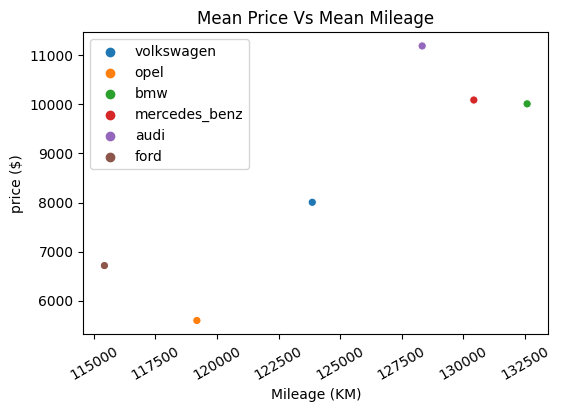

In [39]:
#plotting the top_brand_data using seaborn
ax = sns.scatterplot(y = top_brand_data["price_mean"], x = top_brand_data["mileage_mean"], hue = top_brand_data.index)
ax.set(xlabel = "Mileage (KM)", ylabel = "price ($)", title = "Mean Price Vs Mean Mileage")
ax.set_xticklabels(labels = [112500,115000,117500,120000,122500,125000,127500,130000,132500], rotation = 30)

Looking at the above graph we can understand that as the *mean mileage* increases, the *mean price* of the car also increases. Eventhough the curve is not exactly linear, the trend is apparent.

## 7. More Data Cleaning & Analysis

### 7.1 Translating German Words of Categorical Data to English

In here our goal is to translate the *German* words to *English* and map the values to their English counterparts. 
First we will look at the dataset and check the categorical data among each column and translate them to English.

In [40]:
#look at the first few rows of the dataframe and list the categorical data
autos.head()

,date_crawled,name,seller,offer_type,price_$,ab_test,vehicle_type,registration_year,gear_box,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,date_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,2016-03-26,0,79588,2016-04-06
1,2016-04-04,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04,0,71034,2016-04-06
2,2016-03-26,Volkswagen_Golf_1.6_United,privat,Angebot,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26,0,35394,2016-04-06
3,2016-03-12,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,2016-03-12,0,33729,2016-03-15
4,2016-04-01,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,2016-04-01,0,39218,2016-04-01


Converting words in every column can be painstaking. Columns with car *names*, *models* and *brands* are quite huge and going through each of these is time consuming and laborious. We assume that these are standard for all countries, irrespective of the language, so do not make any changes to them. Below we will consider other categorical data and replace them with English counterparts. 

Let us apply *Series.value_counts()* on every categorical data column and look at the values. Then we will replace the German words with appropriate English words. We will use either *Series.str.replace()* method or *Series.map()* method depending on the number of values to be replaced.

In [41]:
#apply Series.value_counts() method to seller column
autos['seller'].value_counts()

privat        49999
gewerblich        1
Name: seller, dtype: int64

In [42]:
#apply Series.str.replace() method to replace with appropriate English words
autos['seller'] = autos['seller'].str.replace('privat', 'private')
autos['seller'] = autos['seller'].str.replace('gewerblich', 'commercial')

In [43]:
#apply Series.value_counts() method to offer_type column
autos['offer_type'].value_counts()

Angebot    49999
Gesuch         1
Name: offer_type, dtype: int64

In [44]:
#apply Series.str.replace() method to replace with appropriate English words
autos['offer_type'] = autos['offer_type'].str.replace('Angebot', 'offer')
autos['offer_type'] = autos['offer_type'].str.replace('Gesuch', 'Application')

In [45]:
#apply Series.value_counts() method to gear_box column
autos['gear_box'].value_counts()

manuell      36993
automatik    10327
Name: gear_box, dtype: int64

In [46]:
#apply Series.str.replace() method to replace with appropriate English words
autos['gear_box'] = autos['gear_box'].str.replace('manuell', 'manual')
autos['gear_box'] = autos['gear_box'].str.replace('automatik', 'automatic')

In [47]:
#apply Series.value_counts() method to fuel_type column
autos['fuel_type'].value_counts()

benzin     30107
diesel     14567
lpg          691
cng           75
hybrid        37
andere        22
elektro       19
Name: fuel_type, dtype: int64

In [48]:
#apply Series.str.replace() method to replace with appropriate English words
autos['fuel_type'] = autos['fuel_type'].str.replace('benzin', 'petrol')
autos['fuel_type'] = autos['fuel_type'].str.replace('andere', 'other')
autos['fuel_type'] = autos['fuel_type'].str.replace('elektro', 'electric')

In [49]:
#apply Series.value_counts() method to unrepaired_damage column
autos['unrepaired_damage'].value_counts()

nein    35232
ja       4939
Name: unrepaired_damage, dtype: int64

In [50]:
#apply Series.str.replace() method to replace with appropriate English words
autos['unrepaired_damage'] = autos['unrepaired_damage'].str.replace('nein', 'no')
autos['unrepaired_damage'] = autos['unrepaired_damage'].str.replace('ja', 'yes')

In [51]:
#apply Series.value_counts() method to vehicle_type column
autos['vehicle_type'].value_counts()

limousine     12859
kleinwagen    10822
kombi          9127
bus            4093
cabrio         3061
coupe          2537
suv            1986
andere          420
Name: vehicle_type, dtype: int64

In [52]:
#create a mapping dictionary and map it to the vehicle_type column
mapping_dict = {'limousine': 'sedan', 
                'kleinwagen':'small car', 
                'kombi':'station wagon',
                'cabrio':'convertible',
                'andere':'other',
                'bus': 'bus',
                'coupe': 'Coupe',
                'suv':'suv'}
autos['vehicle_type'] = autos['vehicle_type'].map(mapping_dict)

In [53]:
#apply Series.str.replace() method 
autos['model'] = autos['model'].str.replace('andere', 'other')

In [54]:
#print first few rows of the dataframe
autos.head()

,date_crawled,name,seller,offer_type,price_$,ab_test,vehicle_type,registration_year,gear_box,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,date_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26,Peugeot_807_160_NAVTECH_ON_BOARD,private,offer,5000,control,bus,2004,manual,158,other,150000,3,lpg,peugeot,no,2016-03-26,0,79588,2016-04-06
1,2016-04-04,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,private,offer,8500,control,sedan,1997,automatic,286,7er,150000,6,petrol,bmw,no,2016-04-04,0,71034,2016-04-06
2,2016-03-26,Volkswagen_Golf_1.6_United,private,offer,8990,test,sedan,2009,manual,102,golf,70000,7,petrol,volkswagen,no,2016-03-26,0,35394,2016-04-06
3,2016-03-12,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,private,offer,4350,control,small car,2007,automatic,71,fortwo,70000,6,petrol,smart,no,2016-03-12,0,33729,2016-03-15
4,2016-04-01,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,private,offer,1350,test,station wagon,2003,manual,0,focus,150000,7,petrol,ford,no,2016-04-01,0,39218,2016-04-01


We printed few rows of the corrected dataset inorder to check if the required changes have been implimented properly and it looks fine.

### 7.2 Converting the Dates into Uniform Numeric Data

The dataset has three date columns *date_crawled*, *date_created* and *last_seen*. Let us take a look at these columns again.

In [55]:
autos[['date_crawled', 'date_created', 'last_seen']][:5]

,date_crawled,date_created,last_seen
0,2016-03-26,2016-03-26,2016-04-06
1,2016-04-04,2016-04-04,2016-04-06
2,2016-03-26,2016-03-26,2016-04-06
3,2016-03-12,2016-03-12,2016-03-15
4,2016-04-01,2016-04-01,2016-04-01


Our aim is to convert these dates into uniform numeric data which should be in an interger form. To impliment this we will use *Series.str.replace()* method and convert the datatype to *integer*. 

In [56]:
#aplly Series.str.replace() and Series.astype() methods on all the three columns
autos['date_crawled'] = autos['date_crawled'].str.replace('-', '')
autos['date_crawled'].astype('int')

autos['date_created'] = autos['date_created'].str.replace('-', '')
autos['date_created'].astype('int')

autos['last_seen'] = autos['last_seen'].str.replace('-', '')
autos['last_seen'].astype('int')

#check the three columns
autos[['date_crawled', 'date_created', 'last_seen']][:5]

,date_crawled,date_created,last_seen
0,20160326,20160326,20160406
1,20160404,20160404,20160406
2,20160326,20160326,20160406
3,20160312,20160312,20160315
4,20160401,20160401,20160401


We have succesfully converted the three date columns into unifrm numeric data in an integer form.

### 7.3 Checking for Particular Keywords in the Name Column

In here we are going to investigate if there are any keywords in the name column which can be extracted as a new column. 

In [57]:
#look at the first few rows of the name column
autos['name'].head()

0                     Peugeot_807_160_NAVTECH_ON_BOARD
1           BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik
2                           Volkswagen_Golf_1.6_United
3    Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...
4    Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...
Name: name, dtype: object

From the name column data, we observe that the *zeroth position* indicates the *brand name* of the car. *First position* indicates the *model name*. *Second position* onwards indicates *Engine details*.
Since the Engine details of the cars are not given in the dataframe we can extract this as a new column.  

In [58]:
#extract the engine details
autos['engine'] = autos['name'].str.replace('/','_').str.split('_').str[2:]
    
#using Series.str.join() method join the extracted values
autos['engine'] = autos['engine'].str.join(" ")
autos['engine']

0                                     160 NAVTECH ON BOARD
1                        4 4 Liter HAMANN UMBAU Mega Optik
2                                               1.6 United
3                  fortwo coupe softouch F1 Klima Panorama
4        1 6 Benzin TÜV neu ist sehr gepflegt.mit Klima...
                               ...                        
49995             3.0 TDI qu. S tr.  Navi  Panorama  Xenon
49996     F Cabrio Bertone Edition   TÜV neu+Reifen neu !!
49997                                C 1.2 Dualogic Lounge
49998                           2.0 TDI Sportback Ambition
49999                                              1.6 16V
Name: engine, Length: 50000, dtype: object

Below we will extract the first two positions of the *name* column and construct a new column called *brand_model*. This column has all the brand and model names together. 

In [59]:
#using Series.str.replace() method and slicing extract the first two position of the name column
autos['brand_model'] = autos['name'].str.replace('/','_').str.replace('.', '_').str.split('_').str[:2]
    
#using Series.str.join() method join the extracted values
autos['brand_model'] = autos['brand_model'].str.join("_")
autos['brand_model']

0            Peugeot_807
1               BMW_740i
2        Volkswagen_Golf
3            Smart_smart
4             Ford_Focus
              ...       
49995            Audi_Q5
49996         Opel_Astra
49997           Fiat_500
49998            Audi_A3
49999        Opel_Vectra
Name: brand_model, Length: 50000, dtype: object

We have succesfully extracted a column from the *name* column. We have named it *engine*, it has engine details of the car. Let us have a look at it in the main dataset. 

In [60]:
autos.head()

,date_crawled,name,seller,offer_type,price_$,ab_test,vehicle_type,registration_year,gear_box,power_ps,...,registration_month,fuel_type,brand,unrepaired_damage,date_created,nr_of_pictures,postal_code,last_seen,engine,brand_model
0,20160326,Peugeot_807_160_NAVTECH_ON_BOARD,private,offer,5000,control,bus,2004,manual,158,...,3,lpg,peugeot,no,20160326,0,79588,20160406,160 NAVTECH ON BOARD,Peugeot_807
1,20160404,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,private,offer,8500,control,sedan,1997,automatic,286,...,6,petrol,bmw,no,20160404,0,71034,20160406,4 4 Liter HAMANN UMBAU Mega Optik,BMW_740i
2,20160326,Volkswagen_Golf_1.6_United,private,offer,8990,test,sedan,2009,manual,102,...,7,petrol,volkswagen,no,20160326,0,35394,20160406,1.6 United,Volkswagen_Golf
3,20160312,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,private,offer,4350,control,small car,2007,automatic,71,...,6,petrol,smart,no,20160312,0,33729,20160315,fortwo coupe softouch F1 Klima Panorama,Smart_smart
4,20160401,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,private,offer,1350,test,station wagon,2003,manual,0,...,7,petrol,ford,no,20160401,0,39218,20160401,1 6 Benzin TÜV neu ist sehr gepflegt.mit Klima...,Ford_Focus


## 8. More Analysis on the Dataset

### 8.1 Finding the Most Common brand/model Combinations

We have already constructed a column called *brand_model* with brand names and corresponding model names. We just have to count all the unique values in this column.

In [61]:
#apply Series.value_counts() method to calculate the count of each value
autos['brand_model'].value_counts()

Mercedes_Benz            3219
Volkswagen_Golf          1837
Opel_Corsa               1265
Opel_Astra               1123
Audi_A4                  1044
                         ... 
Auto_Chevrolet              1
318i_Touring                1
Bis_das                     1
Gebrauchsspuren_            1
Wunderschoener_twingo       1
Name: brand_model, Length: 7544, dtype: int64

Below we list the most common *brand_model* combination for the cars:- 

 1. *Mercedes_Benz*, it has a total of *3219* cars. 
 2. *Volkswagen_Golf*, this combinatin has a total *1837* cars. 
 3. *Opel_Corsa*, this has total of *1265* combinations. 

### 8.2 Comparing Mean Price of Aggregated Odometer Groups

Here we will create an aggregated odometer groups and analyse the relationship between the mean price and the mileage. First let us group the *odometer_km* column.  

In [62]:
#calculate the minimum
autos['odometer_km'].min()

5000

In [63]:
#calculate the maximum
autos['odometer_km'].max()

150000

Here we will segregate the column *odometer_km* into four groups using *pd.cut()* method. These four groups are:

* Low (ranging from 5000 - 40000)
* Mediam (ranging from 40000 - 80000)
* High (ranging from 80000 - 120000)
* Very High (ranging from 120000 - 150000)

Next we create an empty dictionary and take each group as it's *key* and average price of each group as it's *value*. 

In [64]:
#group the odometer_km values using pd.cut() method
bins = [5000, 40000, 80000, 120000, 150000]
group_names = ['Low', 'Medium', 'High', 'Very High']
autos['odom_group'] = pd.cut(autos['odometer_km'], bins, labels=group_names)
odom_group = autos['odom_group'].unique() #make a list of unique values of the series

#create an empty dictionary
mileage_avg_price = {}

#loop through the odom_group, take each group as key and average price as value
for key in odom_group:
    mileage_avg_price[key] = np.round(autos.loc[autos['odom_group']==key, 'price_$'].mean(), decimals=2)
    
mileage_avg_price

{'Very High': 7994.33,
 'Medium': 13847.91,
 'Low': 27000.69,
 'High': 10562.59,
 nan: nan}

We will convert this into a dataframe so that we can plot it on a graph for clear understanding of the trend.

[Text(0, 0.5, 'Price ($)'),
 Text(0.5, 0, 'Odometer(KM)'),
 Text(0.5, 1.0, 'Odometer Vs Price Graph')]

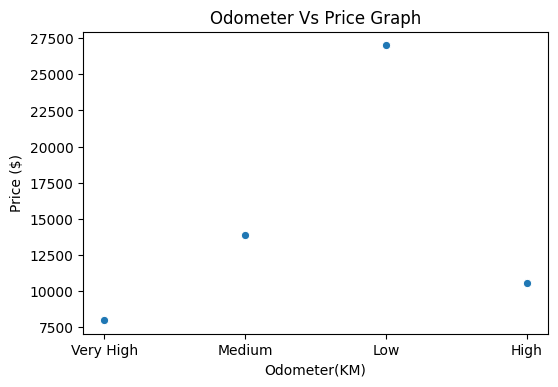

In [65]:
mileage_avg_price_series = pd.Series(data=mileage_avg_price)
ax_1 = sns.scatterplot(data=mileage_avg_price_series)
ax_1.set(xlabel = "Odometer(KM)", ylabel = "Price ($)", title = "Odometer Vs Price Graph")

The average price for the different groups are listed below :-

 1. Group *Low* is highest with *~ \$27000*. 
 2. Group *Medium* is next highest with *~ \$13847*. 
 3. Group *High* is third highest with *~ \$10562*. 
 4. Group *Very High* is the last of all with *~ \$7994*. 
 
 We observe that the car which has covered less distance has higher price and as the distance covered increases the price of the car reduces. The pattern is clear from the above graph.

### 8.3 Relation Between Price and Damage/Non-Damage of Cars

In here we want to find out how much cheaper are the cars with damage (not repaired) than their non-damaged (repaired) counterparts. We will only consider the top six brands for this analysis as it will be easier to compare these.

In [66]:
#create two empty dictionaries, one for not repaired and the other for repaired cars
damage_data_no = {}
damage_data_yes = {}

#loop through the top_brands
for key in top_brands:
    select_brands = autos[autos['brand']==key]  #take brand as dictionary key
    #consider mean price as value
    damage_data_no[key] = np.round(select_brands.loc[select_brands['unrepaired_damage']=='no', 'price_$'].mean(), decimals=2)    
    damage_data_yes[key] = np.round(select_brands.loc[select_brands['unrepaired_damage']=='yes', 'price_$'].mean(), decimals=2)   

damage_data_no

{'volkswagen': 6307.92,
 'opel': 7013.6,
 'bmw': 9266.73,
 'mercedes_benz': 9635.51,
 'audi': 10690.23,
 'ford': 9925.71}

In [67]:
damage_data_yes

{'volkswagen': 3081.82,
 'opel': 1291.33,
 'bmw': 3287.64,
 'mercedes_benz': 3801.08,
 'audi': 3131.91,
 'ford': 1303.7}

Above analysis shows that in general the price of the unrepaired cars is lower than the price of the repaired cars. The average price of unrepaired *volkswagen* is *~ \$3000* cheaper than the repaired *volkswagen*. Other brands also follow the same suit. *opel*, *bmw* and *mercedes benz* are *~ \$6000* cheaper. *ford* is *~ \$8000* cheaper. *audi* is *~ \$7000* cheaper.

## Conclusions

In conclusion, the project was to work with a data set containing the details of used cars from `eBay Klenanzeigen` a classified section of German eBay website. The main objectives of the project were `Data Cleaning/Exploration` and `Data Analysis` :-

* **Data Cleaning** - We have performed data cleaning/exploration wherever it was required. We cleaned the *column names* from *CamelCase* to *SnakeCase* and changed the names of a few columns for better clarity. We explored both the *price* and *odometer* column by examining the statistics of the column-values and dropping unrealistic values. We explored the *date columns*. We dropped all the incorrect *registration year* column values. We translated the *German words* of categorical data into *English words* wherever possible. Converted the dates of all the date columns into uniform numeric data. We extracted two new columns, one *Engine* with the engine details of cars and the other *brand/model* with the brand and model of a car together in one column from the names column.


* **Data Analysis** - We performed quite a few analysis on the data set. They are listed below.

 - `Exploring Price by Brand`:- We selected top 20 brands and calculated the average price of all these brands. The average price for the these brands ranges from around *\$10000* to *\$2000*. Brand *mini* has highest average price i.e. *~\$10566*. Next four brands with highest average price are *sonstige_autos*, *audi*, *mercedes_benz* and *bmw*. At the bottom of the list there are *smart*, *peugeot*, *opel*, *fiat* and the least average price is for *renault* i.e. *~\$2411*.

 - `Mean Price & Mean Mileage of Top Six Brands`:- We calculated the mean mileage and mean price for six unique brands (*volkswagen*, *opel*, *bmw*, *mercedes benz* and *ford*). The *mean mileage* of all these brands are in the range *125000 km - 133000 km*. Highest *mean mileage* is for *bmw*, which is *~ 133076 km* and the lowest is for *ford*, which is *~ 124489 km*. The *mean price* is lowest for *opel* i.e. *~\$2974* and highest for *audi* at *~\$8955*. We also observed that an increase in *mean mileage* resulted in an increase in the *mean_price*. 

 - `Most Common brand/model Combinations`:- We calculated the most common brand/model combinations for cars. And found that *Mercedes_Benz* tops the list with *3219* cars. Next hghest is *Volkswagen_Golf* with *1837* cars.

 - `Mean Price of Aggregated Odometer Groups`:- In here we segregated the *odometer_km* column into four groups depending on the distance covered by the cars. The average price for the group *Low* is highest i.e. *~ \$27000*. The average price for the group *Medium* is next highest i.e. *~ \$13847*. The average price for the group *High* is third highest i.e. *~ \$10562* and the average price for the group *Very High* is the last of all i.e. *~ \$7994*. We observe that the cars which have covered less distance have higher prices and as the distance covered increases the price of these cars reduces.  

 - `Relation Between Price and Damage/Non-Damage of Cars`:- From the analysis we observe that in general the price of the unrepaired cars is lower than the price of the repaired cars. For example, the average price of unrepaired *volkswagen* is *~ \$3000* cheaper than the repaired *volkswagen*. Other brands also follow the same suit. *opel*, *bmw* and *mercedes benz* are *~ \$6000* cheaper. *ford* is *~ \$8000* cheaper. *audi* is *~ \$7000* cheaper.